In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Master_df.csv', index_col = 0)

In [4]:
df.drop(['SV'], axis=1, inplace=True)

In [6]:
df.rename({'Stamina/Consistency':'Stamina'}, axis=1, inplace= True)
df.to_csv('Master_df.csv')

In [5]:
# 595 unique pitchers
len(pd.unique(df['Name']))

595

In [7]:
metrics = df.loc[:,'Pitch Diversity':'Ground Balls']
metrics.drop(['Shannon Diversity'], axis=1, inplace=True)
metrics['performance'] = metrics.sum(axis=1)
metrics

,Pitch Diversity,Strikeouts,Control,Stamina,BA Against,Velocity,Ground Balls,performance
0,14.500000,91.000000,27.750000,96.250000,88.500000,100.000000,57.500000,475.500000
1,8.755760,90.783410,3.686636,51.843318,86.635945,97.004608,88.940092,427.649770
2,9.734513,89.823009,63.716814,78.982301,61.725664,100.000000,80.309735,484.292035
3,20.614035,92.543860,37.280702,86.403509,40.789474,99.122807,94.736842,471.491228
4,7.203390,82.415254,73.305085,87.288136,33.686441,98.728814,85.381356,468.008475
...,...,...,...,...,...,...,...,...
3949,15.966387,64.285714,14.705882,56.722689,71.218487,92.226891,46.428571,361.554622
3950,50.643777,86.695279,18.884120,47.854077,38.626609,96.566524,91.845494,431.115880
3951,37.313433,67.164179,14.925373,27.114428,16.666667,87.810945,71.890547,322.885572
3952,68.208092,67.052023,59.537572,96.242775,69.942197,95.086705,55.491329,511.560694


In [8]:
df['performance'] = metrics['performance']

In [10]:
df.to_csv('Master_df.csv')

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x2510901d948>,
 <a list of 12 Text xticklabel objects>)

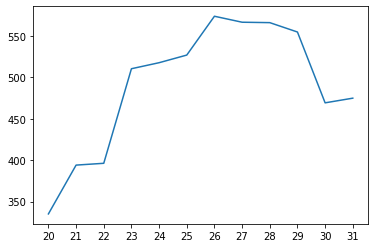

In [42]:
kershaw = df[df['Name'] == 'Clayton Kershaw']
kershaw.reset_index(drop = True, inplace = True)
kershaw['delta'] = kershaw['performance'].pct_change()
plt.plot(kershaw['Age'], kershaw['performance'])
plt.xticks(np.arange(kershaw['Age'].min(), kershaw['Age'].max()+1,1))

([<matplotlib.axis.XTick at 0x25108fa8888>,
 <a list of 12 Text xticklabel objects>)

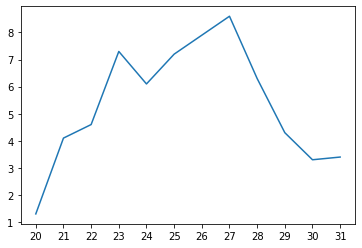

In [41]:
plt.plot(kershaw['Age'], kershaw['WAR'])
plt.xticks(np.arange(kershaw['Age'].min(), kershaw['Age'].max()+1,1))

In [27]:
kershaw['delta']

0          NaN
1     0.176089
2     0.005548
3     0.288450
4     0.014271
5     0.017820
6     0.089041
7    -0.012588
8    -0.000889
9    -0.020006
10   -0.154261
11    0.012007
Name: delta, dtype: float64

In [39]:
prime = []
for i in range(len(kershaw)):
    if kershaw.loc[i, 'performance'] == kershaw['performance'].max():
        prime.append(kershaw.loc[i, 'Age'])
        for j in range(1, len(kershaw) - i):
            if kershaw.loc[i+j, 'delta'] > -0.1:
                prime.append(kershaw.loc[i+j, 'Age'])
            elif kershaw.loc[i+j, 'delta'] <= -0.1:
                break

prime

[26, 27, 28, 29]

In [29]:
def prime(name):
    kershaw = df[df['Name'] == name]
    kershaw.reset_index(drop = True, inplace = True)
    kershaw['delta'] = kershaw['performance'].pct_change()

    years = []
    for i in range(len(kershaw)):
        if kershaw.loc[i, 'performance'] == kershaw['performance'].max():
            years.append(kershaw.loc[i, 'Age'])
            for j in range(1, len(kershaw) - i):
                if kershaw.loc[i+j, 'delta'] > -0.1:
                    years.append(kershaw.loc[i+j, 'Age'])
                elif kershaw.loc[i+j, 'delta'] <= -0.1:
                    break
    s = 'Prime Years: '
    for yr in years:
        s = s + str(yr) + ', '
    s = s.rstrip(', ')
    return s

In [30]:
yrs = prime('Clayton Kershaw')

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
yrs

'Prime Years: 26, 27, 28, 29'

In [12]:
df[df['Pitch Diversity'] == df['Pitch Diversity'].max()]['FBv']

860     88.4
1316    87.8
1627    81.8
1879    91.9
1885    88.3
2285    86.6
2590    87.1
2639    91.8
2812    89.6
2835    88.7
2836    88.4
2841    84.4
2996    86.1
3425    86.8
3428    86.5
3429    85.3
3646    87.9
3673    94.0
Name: FBv, dtype: float64